In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime


In [5]:
cdr_data = pd.read_csv("Documents/dynamo/CDR.csv")


half_count = len(cdr_data) / 2
cdr_data_droped = cdr_data.dropna(thresh=half_count,axis=1)  #remove columns where 50 percent of data missing
row, columns = cdr_data_droped.shape
columns_names = cdr_data_droped.columns.tolist()

cdr_data_droped.tail(10)

#cdr_data_droped.dtypes

/home/aswin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (30,68,106) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Id,SegmentNumber,StartTime,Duration,GlobalCellId,Layer3Identifier,IMSIIMSI,IMEIIMEI,SV,M-TMSI,...,LocationType,LocationX,LocationY,LocationConfidence,LocationUncertainty,Measurements[GlobalCellId;PhysicalCellId;Rsrp;Rsrq;EventType;Arfcn],Mobility,TimingAdvance.1,IndoorOutdoorClassification,SecondaryCells
9990,1376343744999648,8,2018-12-07T01:45:44.843Z,5106,338649983632655,8834384098664713545,IMSI8911,IMEI2713,27.0,4.146487e+09,...,18876416,716338,3665495,0.1025,246,[338649983632655;265;35;15;PeriodicReportStron...,7.438969,12.0,Unknown,"[{ ""timestamp"": ""2018-12-07T01:45:44.843Z""; ""d..."
9991,1376343744999648,9,2018-12-07T01:45:49.949Z,5103,338649983632655,8834384098664713545,IMSI8911,IMEI2713,27.0,4.146487e+09,...,18876416,716338,3665495,0.1025,246,[338649983632655;265;36;14;PeriodicReportStron...,7.620586,12.0,Unknown,"[{ ""timestamp"": ""2018-12-07T01:45:49.949Z""; ""d..."
9992,1376343744999648,10,2018-12-07T01:45:55.052Z,5070,338649983632655,8834384098664713545,IMSI8911,IMEI2713,27.0,4.146487e+09,...,18876416,716338,3665495,0.1025,246,[338649983632655;265;37;16;PeriodicReportStron...,7.782267,12.0,Unknown,"[{ ""timestamp"": ""2018-12-07T01:45:55.052Z""; ""d..."
9993,1376343744999648,11,2018-12-07T01:46:00.122Z,5120,338649983632655,8834384098664713545,IMSI8911,IMEI2713,27.0,4.146487e+09,...,18876416,716388,3665567,0.0856,295,[338649983632655;265;36;13;PeriodicReportStron...,7.969591,12.0,Unknown,"[{ ""timestamp"": ""2018-12-07T01:46:00.122Z""; ""d..."
9994,1376343744999648,12,2018-12-07T01:46:05.242Z,5107,338649983632655,8834384098664713545,IMSI8911,IMEI2713,27.0,4.146487e+09,...,18876416,716402,3665618,0.0856,295,[338649983632655;265;36;12;PeriodicReportStron...,6.247166,12.0,Unknown,"[{ ""timestamp"": ""2018-12-07T01:46:05.242Z""; ""d..."
9995,1376343744999648,13,2018-12-07T01:46:10.349Z,5121,338649983632655,8834384098664713545,IMSI8911,IMEI2713,27.0,4.146487e+09,...,18876416,716402,3665618,0.0856,295,[338649983632655;265;37;14;PeriodicReportStron...,6.125596,12.0,Unknown,"[{ ""timestamp"": ""2018-12-07T01:46:10.349Z""; ""d..."
9996,1376343744999648,14,2018-12-07T01:46:15.470Z,5120,338649983632655,8834384098664713545,IMSI8911,IMEI2713,27.0,4.146487e+09,...,18876416,716396,3665589,0.0856,295,[338649983632655;265;36;15;PeriodicReportStron...,5.989214,12.0,Unknown,"[{ ""timestamp"": ""2018-12-07T01:46:15.470Z""; ""d..."
9997,1376343744999648,15,2018-12-07T01:46:20.590Z,5119,338649983632655,8834384098664713545,IMSI8911,IMEI2713,27.0,4.146487e+09,...,18876416,716680,3665605,0.0856,295,[338649983632655;265;35;14;PeriodicReportStron...,5.817616,12.0,Unknown,"[{ ""timestamp"": ""2018-12-07T01:46:20.590Z""; ""d..."
9998,1376343744999648,16,2018-12-07T01:46:25.709Z,5121,338649983632655,8834384098664713545,IMSI8911,IMEI2713,27.0,4.146487e+09,...,18876416,716680,3665605,0.0736,344,[338649983632655;265;36;14;PeriodicReportStron...,3.386561,12.0,Unknown,"[{ ""timestamp"": ""2018-12-07T01:46:25.709Z""; ""d..."
9999,1376343744999648,17,2018-12-07T01:46:30.830Z,5143,338649983632655,8834384098664713545,IMSI8911,IMEI2713,27.0,4.146487e+09,...,18876416,716683,3665595,0.1025,246,[338649983632655;265;35;12;PeriodicReportStron...,3.225234,12.0,Unknown,"[{ ""timestamp"": ""2018-12-07T01:46:30.830Z""; ""d..."


Id 2982
SegmentNumber 171
StartTime 9119
Duration 4227
GlobalCellId 143
Layer3Identifier 3271
IMSIIMSI 1911
IMEIIMEI 1906
SV 63
M-TMSI 1693
ENodeBs1ApId 2136
MmeS1ApId 2196
Vendor 1
CoreNetworkPlmn 2
StartReason 11
StartOutcome 2
EndReason 6
EndCategory 3
StartTime(1) 5978
Duration(1) 3429
BearerType(1) 2
ErabId(1) 3
Qci(1) 5
UlVolume(1) 528
DlVolume(1) 295
DlAckVol(1) 293
DlAckVolAllTti(1) 541
NumDlRlcDelaySamples(1) 182
NumDlLatencySamples(1) 134
StartReasonCode(1) 6
SetupOutcome(1) 4
EndReasonCode(1) 11
EndCategory(1) 4
EndSource(1) 3
StartTime(2) 4905
Duration(2) 2928
BearerType(2) 2
ErabId(2) 4
UlVolume(2) 269
DlVolume(2) 143
DlAckVol(2) 143
DlAckVolAllTti(2) 276
NumDlRlcDelaySamples(2) 98
NumDlLatencySamples(2) 76
StartReasonCode(2) 6
SetupOutcome(2) 4
EndReasonCode(2) 9
EndCategory(2) 4
EndSource(2) 3
LocationType 32
LocationX 2600
LocationY 2756
LocationConfidence 441
LocationUncertainty 561
Measurements[GlobalCellId;PhysicalCellId;Rsrp;Rsrq;EventType;Arfcn] 7499
Mobility 3691


[Text(0, 0, 'StartTime'),
 Text(0, 0, 'Measurements[GlobalCellId;PhysicalCellId;Rsrp;Rsrq;EventType;Arfcn]'),
 Text(0, 0, 'StartTime(1)'),
 Text(0, 0, 'SecondaryCells'),
 Text(0, 0, 'StartTime(2)'),
 Text(0, 0, 'Duration'),
 Text(0, 0, 'Mobility'),
 Text(0, 0, 'Duration(1)'),
 Text(0, 0, 'Layer3Identifier'),
 Text(0, 0, 'Id'),
 Text(0, 0, 'Duration(2)'),
 Text(0, 0, 'LocationY'),
 Text(0, 0, 'LocationX'),
 Text(0, 0, 'MmeS1ApId'),
 Text(0, 0, 'ENodeBs1ApId'),
 Text(0, 0, 'IMSIIMSI'),
 Text(0, 0, 'IMEIIMEI'),
 Text(0, 0, 'M-TMSI'),
 Text(0, 0, 'LocationUncertainty'),
 Text(0, 0, 'DlAckVolAllTti(1)'),
 Text(0, 0, 'UlVolume(1)'),
 Text(0, 0, 'LocationConfidence'),
 Text(0, 0, 'DlVolume(1)'),
 Text(0, 0, 'DlAckVol(1)'),
 Text(0, 0, 'DlAckVolAllTti(2)'),
 Text(0, 0, 'UlVolume(2)'),
 Text(0, 0, 'NumDlRlcDelaySamples(1)'),
 Text(0, 0, 'SegmentNumber'),
 Text(0, 0, 'GlobalCellId'),
 Text(0, 0, 'DlVolume(2)'),
 Text(0, 0, 'DlAckVol(2)'),
 Text(0, 0, 'NumDlLatencySamples(1)'),
 Text(0, 0, 'NumDl

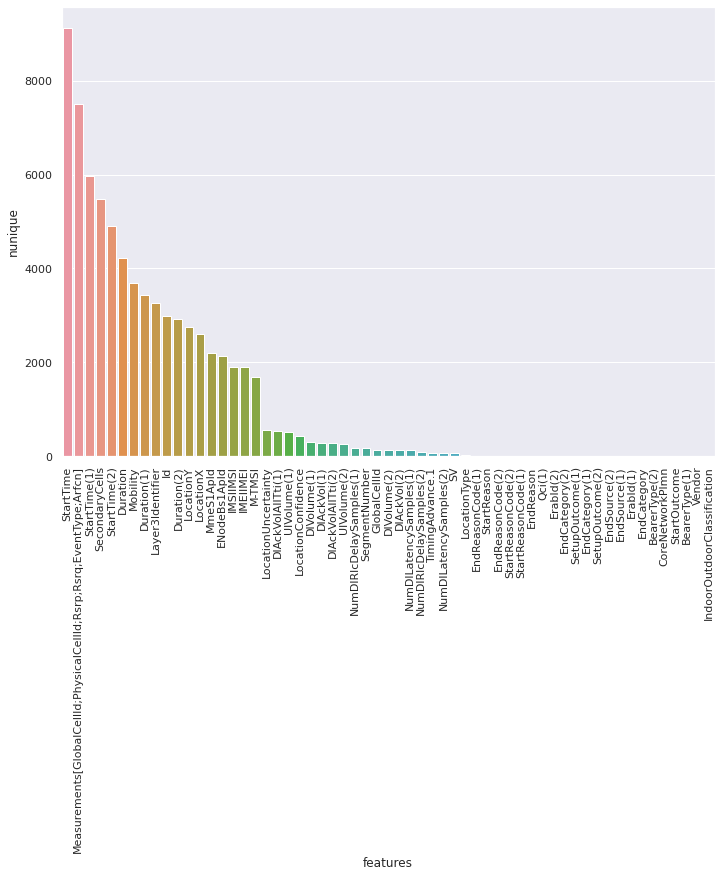

In [6]:
for i in columns_names:
    print (i,cdr_data_droped[i].nunique())
    access=cdr_data_droped[i].nunique()

    
check = cdr_data_droped.nunique() #columns with corresponding number of unique elements    

sns.set(rc={'figure.figsize':(11.7,8.27)})
    
nu = check.reset_index() # Convert it to Pandas.DataFrame (cdr_data_droped) with reset_index() and call seaborn
nu.columns = ['features','nunique'] 

ax = sns.barplot(x='features', y='nunique', data=nu, order=nu.sort_values('nunique',ascending = False).features)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#nu['features']= 
    

In [12]:

#print (cdr_data_droped['Duration(1)'].head(15))
#print (cdr_data_droped['Duration(2)'].head(15))
s=cdr_data_droped['StartTime']

Date = []
    
for i in s:
    i = i.replace("T"," ") 
    i = i.replace("Z","") 
    Date.append(i)
    
      
    
cdr_data_droped["Dates"] = Date



print (cdr_data_droped)

                    Id  SegmentNumber                 StartTime  Duration  \
0     1517081233356552              0  2018-12-07T01:45:00.013Z        36   
1     1517076938385810             22      2018-12-07T01:45:00Z       224   
2     1517081233356583              0  2018-12-07T01:45:00.373Z        40   
3     1517081233356586              0  2018-12-07T01:45:00.443Z        38   
4     1517081233356612              0  2018-12-07T01:45:00.912Z        42   
...                ...            ...                       ...       ...   
9995  1376343744999648             13  2018-12-07T01:46:10.349Z      5121   
9996  1376343744999648             14  2018-12-07T01:46:15.470Z      5120   
9997  1376343744999648             15  2018-12-07T01:46:20.590Z      5119   
9998  1376343744999648             16  2018-12-07T01:46:25.709Z      5121   
9999  1376343744999648             17  2018-12-07T01:46:30.830Z      5143   

         GlobalCellId      Layer3Identifier   IMSIIMSI   IMEIIMEI    SV  \


<ipython-input-12-34600897f798>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdr_data_droped["Dates"] = Date


In [13]:

cdr_data_copy= pd.read_csv("Documents/dynamo/CDR.csv")
import datetime

strip = cdr_data_droped["Dates"]

cdr_data_copy['StartTime'] =  pd.to_datetime(cdr_data_copy['StartTime'])

print (cdr_data_copy['StartTime'])

0      2018-12-07 01:45:00.013000+00:00
1             2018-12-07 01:45:00+00:00
2      2018-12-07 01:45:00.373000+00:00
3      2018-12-07 01:45:00.443000+00:00
4      2018-12-07 01:45:00.912000+00:00
                     ...               
9995   2018-12-07 01:46:10.349000+00:00
9996   2018-12-07 01:46:15.470000+00:00
9997   2018-12-07 01:46:20.590000+00:00
9998   2018-12-07 01:46:25.709000+00:00
9999   2018-12-07 01:46:30.830000+00:00
Name: StartTime, Length: 10000, dtype: datetime64[ns, UTC]


/home/aswin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (30,68,106) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
only_date = []
cdr_data_copy['only_date'] = pd.to_datetime(cdr_data_copy['StartTime']).dt.date #to convert StartTime to a new columns with date
cdr_data_copy['only_time'] = pd.to_datetime(cdr_data_copy['StartTime']).dt.time
cdr_data_copy.info()


cdr_data_copy["Duration"].mean()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 241 entries, Id to only_time
dtypes: datetime64[ns, UTC](1), float64(179), int64(9), object(51), uint64(1)
memory usage: 18.4+ MB


3984.6717

In [22]:
from pandas.plotting import autocorrelation_plot

trend_check = cdr_data_copy[['StartTime','Duration']] 

print (trend_check)

                            StartTime  Duration
0    2018-12-07 01:45:00.013000+00:00        36
1           2018-12-07 01:45:00+00:00       224
2    2018-12-07 01:45:00.373000+00:00        40
3    2018-12-07 01:45:00.443000+00:00        38
4    2018-12-07 01:45:00.912000+00:00        42
...                               ...       ...
9995 2018-12-07 01:46:10.349000+00:00      5121
9996 2018-12-07 01:46:15.470000+00:00      5120
9997 2018-12-07 01:46:20.590000+00:00      5119
9998 2018-12-07 01:46:25.709000+00:00      5121
9999 2018-12-07 01:46:30.830000+00:00      5143

[10000 rows x 2 columns]


TypeError: strptime() argument 1 must be str, not Timestamp